# Adidas Sales Prediction

The data belongs to 'Adidas Sales in Us'
Time period: 2020-2021

### Importing the Necessary packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.model_selection import train_test_split
import sklearn.linear_model as sl
lr = sl.LinearRegression()
import sklearn.tree as tree
dtr = tree.DecisionTreeRegressor()
import sklearn.ensemble as se
rfr = se.RandomForestRegressor(n_estimators=100,max_depth=6, min_samples_leaf=50,n_jobs=4)
import sklearn.metrics as mt
import math
import pickle
import warnings
warnings.filterwarnings('ignore')

### Data Collecting

In [2]:
df = pd.read_excel("Adidas US Sales Datasets.xlsx")
df.head()

,Unnamed: 0,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,NaN,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50,1200,600000.0,300000.0,0.50,In-store
1,NaN,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000.0,150000.0,0.30,In-store
2,NaN,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40,1000,400000.0,140000.0,0.35,In-store
3,NaN,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500.0,133875.0,0.35,In-store
4,NaN,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60,900,540000.0,162000.0,0.30,In-store


### Data Cleaning, Data analysis and Feature Engineering

In [3]:
# Removing the un necessary columns
df.drop(['Unnamed: 0', 'Retailer ID', 'Invoice Date' ], axis=1, inplace = True)
df.head()

,Retailer,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,Northeast,New York,New York,Men's Street Footwear,50,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,Northeast,New York,New York,Women's Street Footwear,40,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,Northeast,New York,New York,Men's Apparel,60,900,540000.0,162000.0,0.30,In-store


In [4]:
df.describe()

,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,45.216625,256.930037,93273.437500,34425.244761,0.422991
std,14.705397,214.252030,141916.016727,54193.113713,0.097197
min,7.000000,0.000000,0.000000,0.000000,0.100000
25%,35.000000,106.000000,4254.500000,1921.752500,0.350000
50%,45.000000,176.000000,9576.000000,4371.420000,0.410000
75%,55.000000,350.000000,150000.000000,52062.500000,0.490000
max,110.000000,1275.000000,825000.000000,390000.000000,0.800000


In [5]:
df.shape

(9648, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Retailer          9648 non-null   object 
 1   Region            9648 non-null   object 
 2   State             9648 non-null   object 
 3   City              9648 non-null   object 
 4   Product           9648 non-null   object 
 5   Price per Unit    9648 non-null   int64  
 6   Units Sold        9648 non-null   int64  
 7   Total Sales       9648 non-null   float64
 8   Operating Profit  9648 non-null   float64
 9   Operating Margin  9648 non-null   float64
 10  Sales Method      9648 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 829.2+ KB


In [7]:
# Finding the null values
df.isna().sum()

Retailer            0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [8]:
# Finding the duplicate rows
df.duplicated().sum()

283

In [9]:
df.dtypes

Retailer             object
Region               object
State                object
City                 object
Product              object
Price per Unit        int64
Units Sold            int64
Total Sales         float64
Operating Profit    float64
Operating Margin    float64
Sales Method         object
dtype: object

In [10]:
# Divide the categorical and numerical features in order to make proper data visualizations and data preprocessing
Categorical_Features = []
Numerical_Features = []

for feature in df.columns:
    if ((df[feature].dtypes=='O') & (feature not in 'Total Sales')):
        Categorical_Features.append(feature)
    elif(feature not in 'Total Sales'):
        Numerical_Features.append(feature)
print(Categorical_Features)
print(Numerical_Features)

['Retailer', 'Region', 'State', 'City', 'Product', 'Sales Method']
['Price per Unit', 'Units Sold', 'Operating Profit', 'Operating Margin']


### Data Visualization

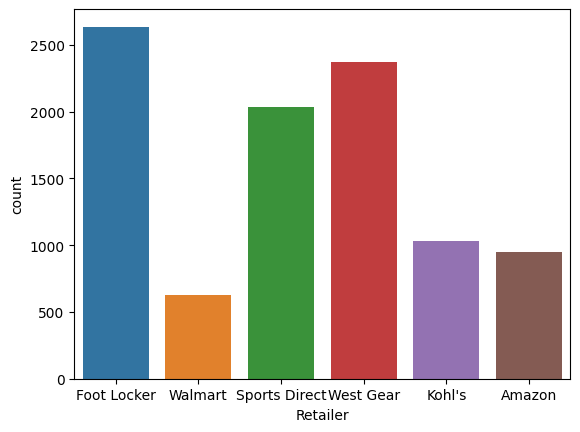

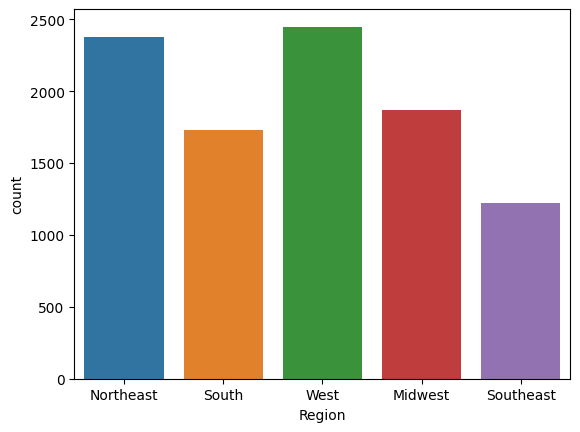

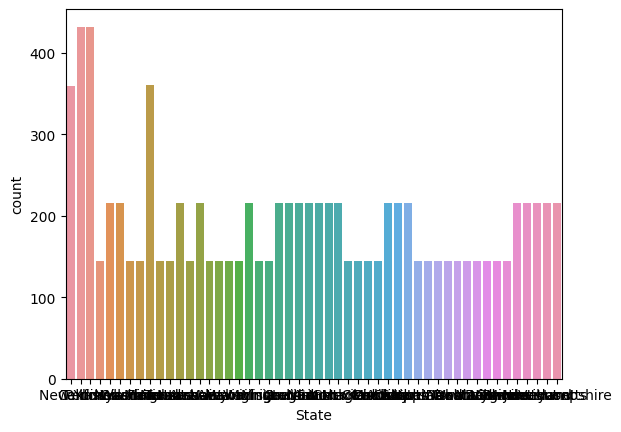

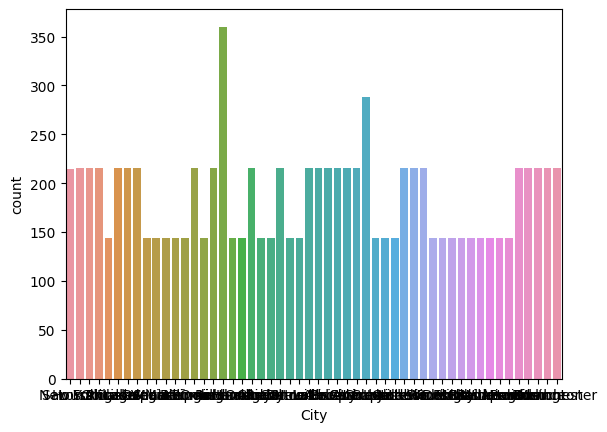

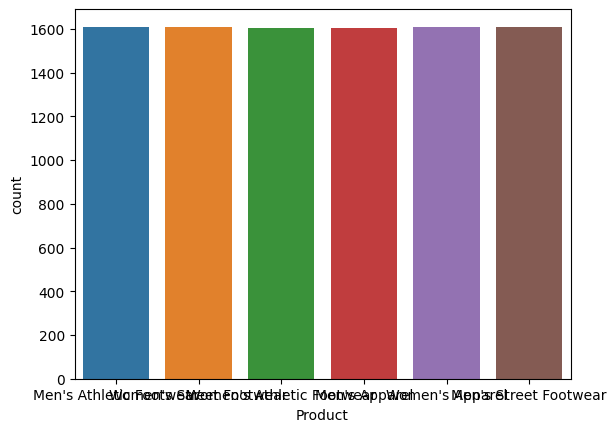

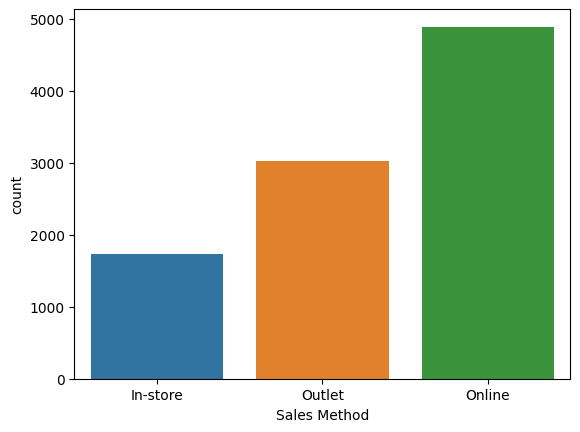

In [11]:
# Visualize the categorical columns with the count plot
for cf in Categorical_Features:
    fig,ax = plt.subplots(1,1)
    sns.countplot(x = df[cf][1:])

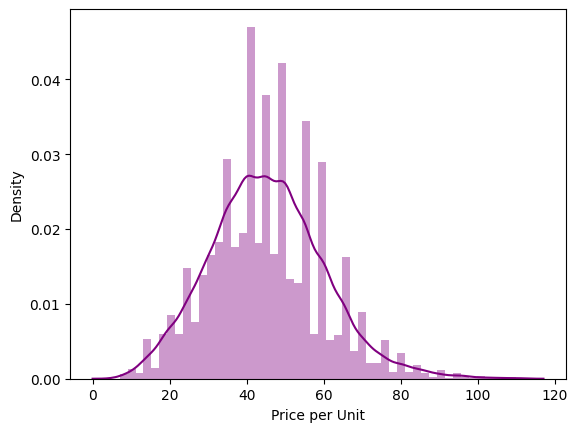

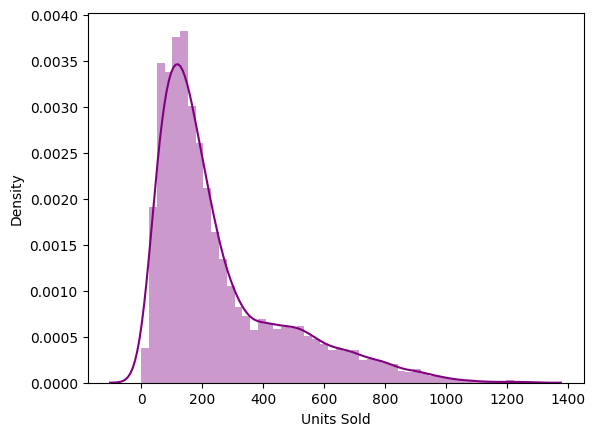

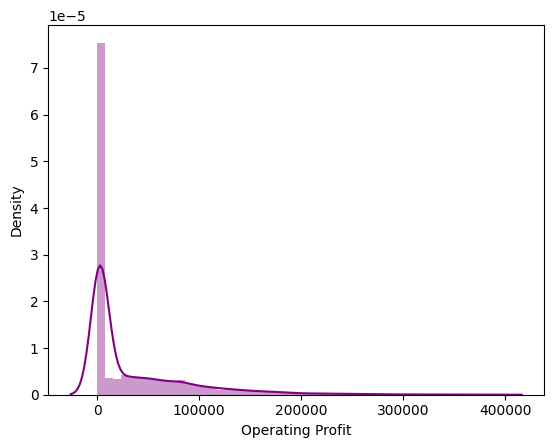

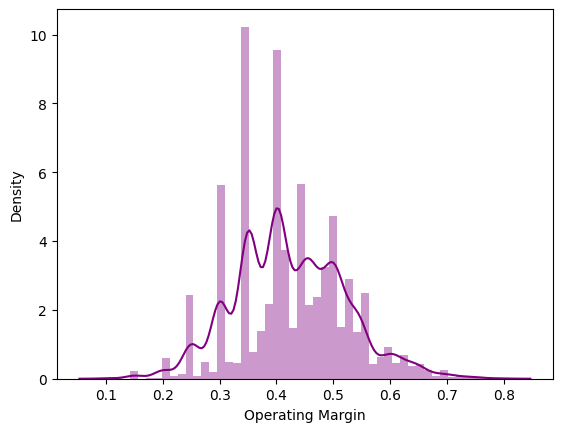

In [12]:
# Visualize the numerical features with the ditribution plot
for nf in Numerical_Features:
    fig,ax = plt.subplots(1,1)
    sns.distplot(df[nf], color = 'purple')

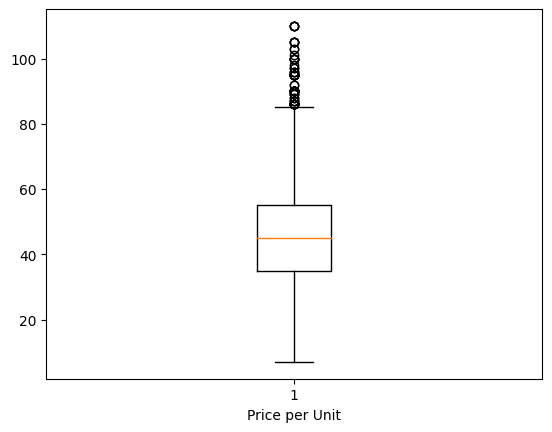

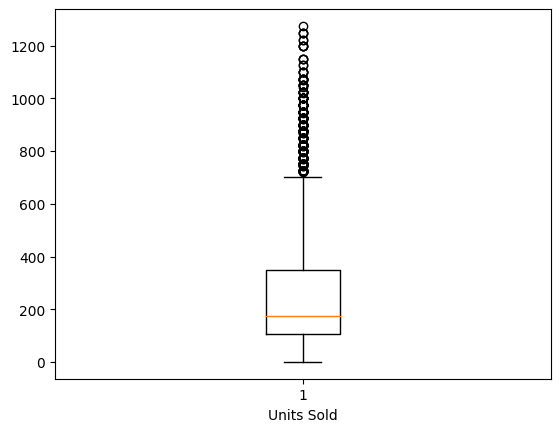

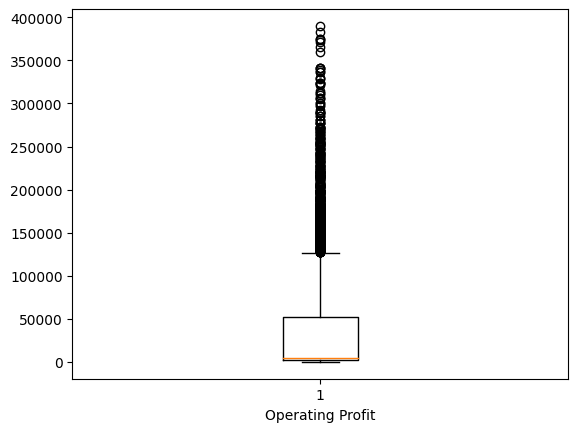

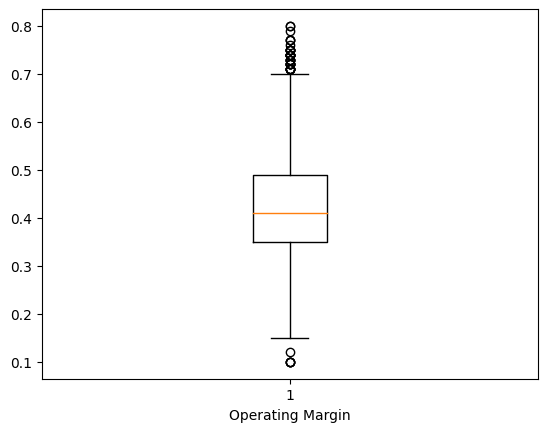

In [13]:
for nf in Numerical_Features:
    plt.boxplot(df[nf])
    plt.xlabel(nf)
    plt.show()

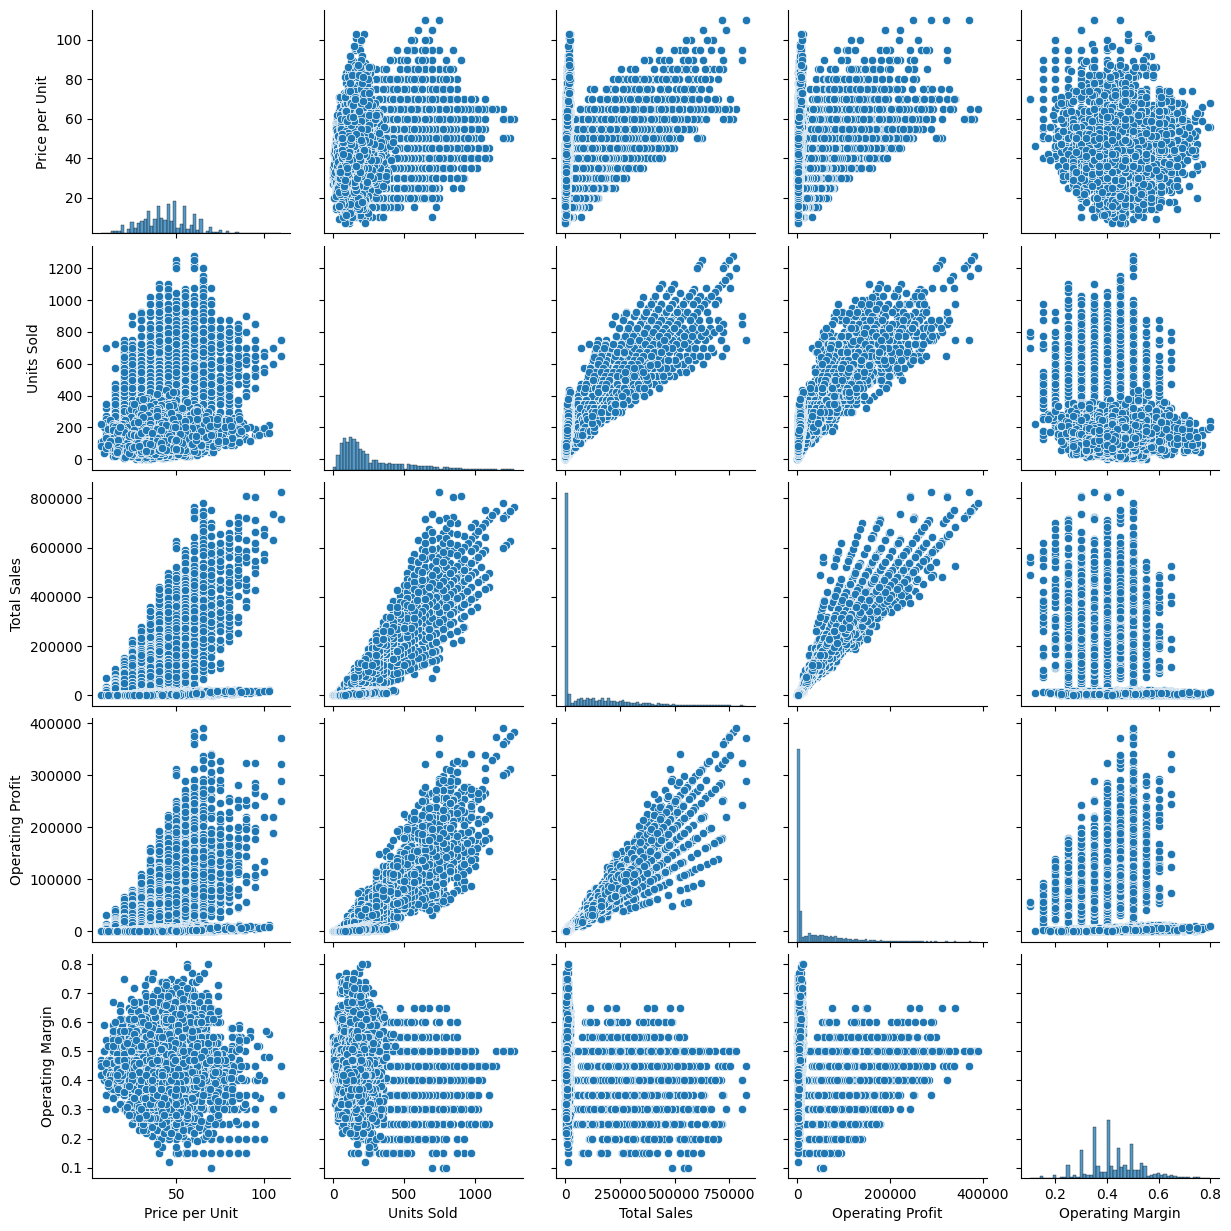

In [14]:
sns.pairplot(df)
plt.show()

<AxesSubplot:>

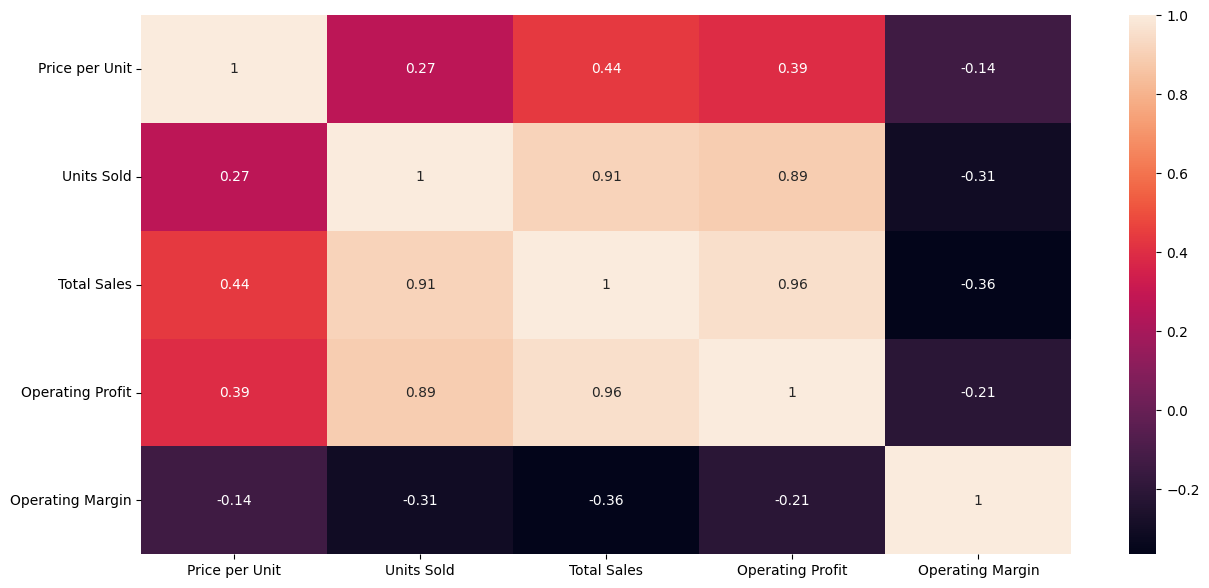

In [15]:
cor_mat = df.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

In [16]:
# Changing the categorical columns to numerical by using the label encoding method.
for cf in Categorical_Features:
    df[cf] = le.fit_transform(df[cf])

In [17]:
df.dtypes

Retailer              int32
Region                int32
State                 int32
City                  int32
Product               int32
Price per Unit        int64
Units Sold            int64
Total Sales         float64
Operating Profit    float64
Operating Margin    float64
Sales Method          int32
dtype: object

In [18]:
df.describe()

,Retailer,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
count,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,2.608520,2.000000,24.223881,25.768657,2.499793,45.216625,256.930037,93273.437500,34425.244761,0.422991,1.132566
std,1.726698,1.471191,14.742644,14.883855,1.707549,14.705397,214.252030,141916.016727,54193.113713,0.097197,0.689738
min,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,1.000000,1.000000,10.000000,12.000000,1.000000,35.000000,106.000000,4254.500000,1921.752500,0.350000,1.000000
50%,3.000000,2.000000,25.000000,26.000000,2.000000,45.000000,176.000000,9576.000000,4371.420000,0.410000,1.000000
75%,4.000000,4.000000,37.000000,39.000000,4.000000,55.000000,350.000000,150000.000000,52062.500000,0.490000,2.000000
max,5.000000,4.000000,49.000000,51.000000,5.000000,110.000000,1275.000000,825000.000000,390000.000000,0.800000,2.000000


In [19]:
x = df.drop(['Total Sales'], axis = 1)
x.head()

,Retailer,Region,State,City,Product,Price per Unit,Units Sold,Operating Profit,Operating Margin,Sales Method
0,1,1,31,35,2,50,1200,300000.0,0.50,0
1,1,1,31,35,1,50,1000,150000.0,0.30,0
2,1,1,31,35,5,40,1000,140000.0,0.35,0
3,1,1,31,35,4,45,850,133875.0,0.35,0
4,1,1,31,35,0,60,900,162000.0,0.30,0


In [20]:
y = df.drop(x.columns, axis = 1)
y.head()

,Total Sales
0,600000.0
1,500000.0
2,400000.0
3,382500.0
4,540000.0


In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.33, random_state = 0)

In [22]:
# Fitting the data to the different models Linear Regressor, Decission Tree Regressor and Random Forest Regressor 
# and also finding the score
s = []
model = [lr, dtr, rfr]
lr.fit(x_train,y_train)
lrs = lr.score(x_test, y_test)
s.append(lrs)
dtr.fit(x_train,y_train)
dtrs = dtr.score(x_test, y_test)
s.append(dtrs)
rfr.fit(x_train,y_train)
rfrs = rfr.score(x_test, y_test)
s.append(rfrs)

# Finding the best model for the 
max_score = max(s)
for i in range(len(s)):
    if s[i] == max_score :
        best_model = model[i] 
print(s)
print(best_model)

[0.9582887129362051, 0.9982439377599595, 0.976125862183292]
DecisionTreeRegressor()


In [23]:
# Predict the value for best model and finding the MSE, RMSE, MAE
y_predict = best_model.predict(x_test)
MSE = mt.mean_squared_error(y_test, y_predict)
RMSE = math.sqrt(MSE)
MAE = mt.mean_absolute_error(y_test,y_predict)
print(MSE, RMSE, MAE)

33308813.78674623 5771.378846233041 1068.634108040201
